<a href="https://colab.research.google.com/github/yukta2106/ML-ANN-Experiments/blob/main/ML_Exp_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original Data Shape: (150, 4) (4 features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])

Data successfully standardized.
Transformed Data Shape: (150, 2) (Reduced to 2 components)

-- PCA Analysis --
Explained Variance (PC1, PC2): [0.7296 0.2285]
Cumulative Explained Variance: 0.9581 (95.81% of total variance retained)


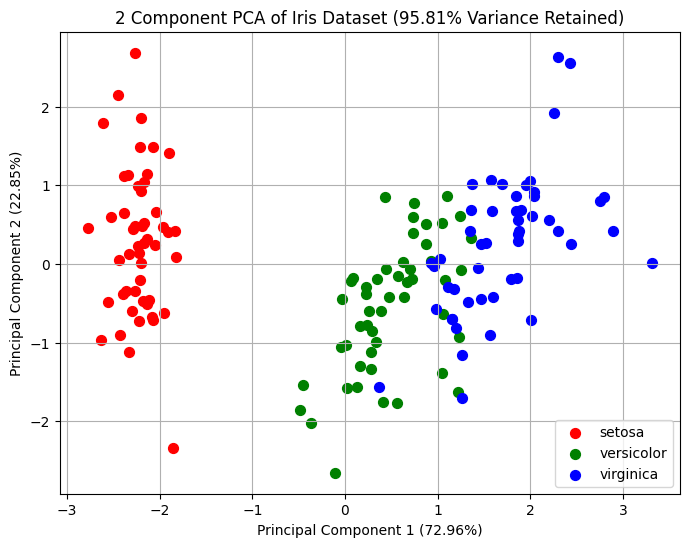

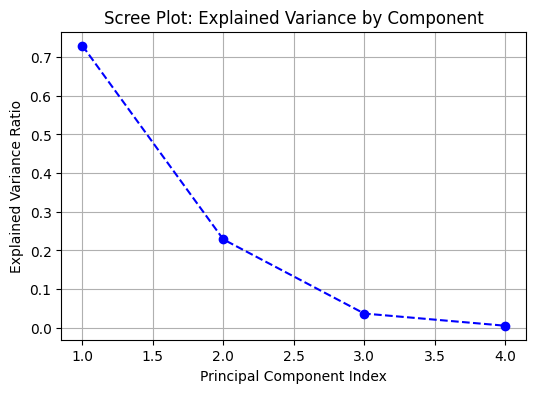

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# --- 1. Setup and Data Loading ---

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target # Target labels (for visualization/evaluation)
feature_names = iris.feature_names
target_names = iris.target_names

print(f"Original Data Shape: {X.shape} (4 features: {feature_names})")

# --- 2. Standardize the Data ---

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform
X_scaled = scaler.fit_transform(X)

print("\nData successfully standardized.")

# --- 3. Perform PCA ---

# Instantiate PCA to keep 2 principal components
# We choose 2 components so we can plot the result easily
N_COMPONENTS = 2
pca = PCA(n_components=N_COMPONENTS)

# Fit PCA to the scaled data and transform it
X_pca = pca.fit_transform(X_scaled)

print(f"Transformed Data Shape: {X_pca.shape} (Reduced to {N_COMPONENTS} components)")

# --- 4. Analyze and Visualize ---

# A. Explained Variance Ratio
print("\n-- PCA Analysis --")
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance (PC1, PC2): {explained_variance.round(4)}")
print(f"Cumulative Explained Variance: {explained_variance.sum().round(4)} ({explained_variance.sum()*100:.2f}% of total variance retained)")

# B. Create a DataFrame for easier plotting
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(N_COMPONENTS)])
pca_df['Target'] = y

# C. Visualization (2D Scatter Plot)
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']

for target, color in zip(np.unique(y), colors):
    indices_to_keep = pca_df['Target'] == target
    plt.scatter(pca_df.loc[indices_to_keep, 'PC1'],
                pca_df.loc[indices_to_keep, 'PC2'],
                c=color,
                s=50,
                label=target_names[target])

plt.title(f'2 Component PCA of Iris Dataset ({explained_variance.sum()*100:.2f}% Variance Retained)')
plt.xlabel(f'Principal Component 1 ({explained_variance[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]*100:.2f}%)')
plt.legend()
plt.grid()
plt.show()

# D. Scree Plot (to visualize the variance captured by all possible components)
# Re-run PCA without limiting the number of components
pca_full = PCA()
pca_full.fit(X_scaled)
variance_explained = pca_full.explained_variance_ratio_

plt.figure(figsize=(6, 4))
plt.plot(range(1, len(variance_explained) + 1), variance_explained, marker='o', linestyle='--', color='blue')
plt.title('Scree Plot: Explained Variance by Component')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()